# Calibration
---------------------------------

This example shows us how to use the calibration method to calibrate a classifier.

The data used is a variation on the Australian weather dataset from [https://www.kaggle.com/jsphyg/weather-dataset-rattle-package](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package). The goal of this dataset is to predict whether or not it will rain tomorrow training a binay classifier on target `RainTomorrow`.

## Load the data

In [1]:
# Import packages
import pandas as pd
from atom import ATOMClassifier

In [2]:
# Get the dataset's features and targets
X = pd.read_csv('./datasets/weatherAUS.csv')

# Let's have a look at a subset of the data
X.sample(frac=1).iloc[:5, :8]

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed
99450,MountGambier,11.3,23.1,0.0,7.0,12.8,S,50.0
103753,Woomera,16.0,28.9,0.0,10.4,8.2,ESE,44.0
120513,Perth,14.7,17.8,8.6,2.0,5.3,SW,43.0
47178,Canberra,13.2,18.7,0.0,NaN,NaN,E,31.0
54139,Ballarat,7.6,19.1,0.0,NaN,NaN,SE,48.0


## Run the pipeline

In [3]:
# Initialize the ATOM class
atom = ATOMClassifier(X, y='RainTomorrow', n_rows=1e4, verbose=1, warnings='ignore', random_state=1)

# Handle missing values and categorical columns in the dataset
atom.impute(strat_num='median', strat_cat='most_frequent')
atom.encode(5, encode_type='target', frac_to_other=0.05)

# Fit a linear SVM to the data
atom.run('lsvm')

<< ================== ATOM ================== >>
Algorithm task: binary classification.
Applying data cleaning...

Dataset stats ================= >>
Shape: (10000, 22)
Missing values: 20763
Categorical columns: 5
Scaled: False
----------------------------------
Size of training set: 8000
Size of test set: 2000

Fitting Imputer...
Imputing missing values...
Fitting Encoder...
Encoding categorical columns...

Running pipeline ============================= >>
Models in pipeline: lSVM
Metric: f1


Results for Linear SVM:         
Fitting -----------------------------------------
Score on the train set --> f1: 0.5654
Score on the test set  --> f1: 0.5938
Time elapsed: 0.442s
-------------------------------------------------
Total time: 0.451s


Final results ========================= >>
Duration: 0.453s
------------------------------------------
Linear SVM --> f1: 0.594


## Analyze the results

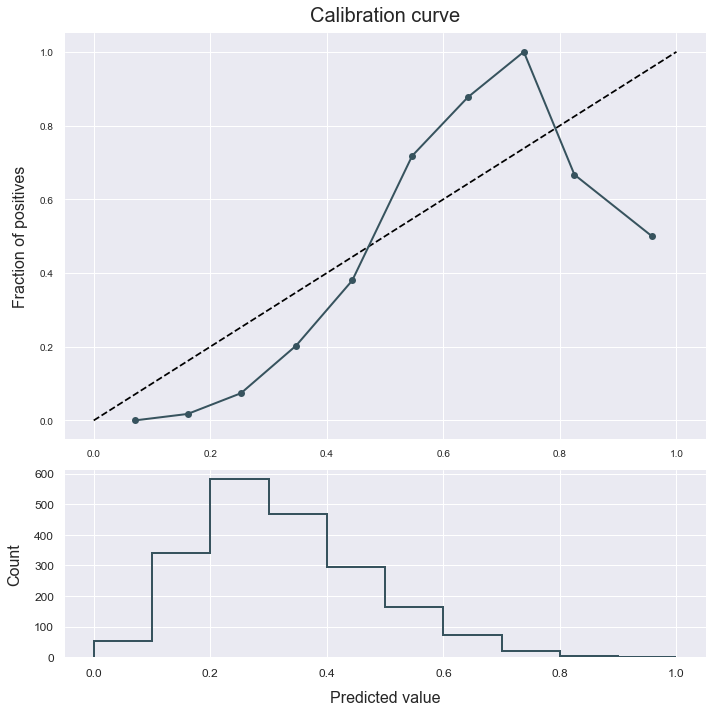

In [4]:
# Check our model's calibration
atom.plot_calibration()

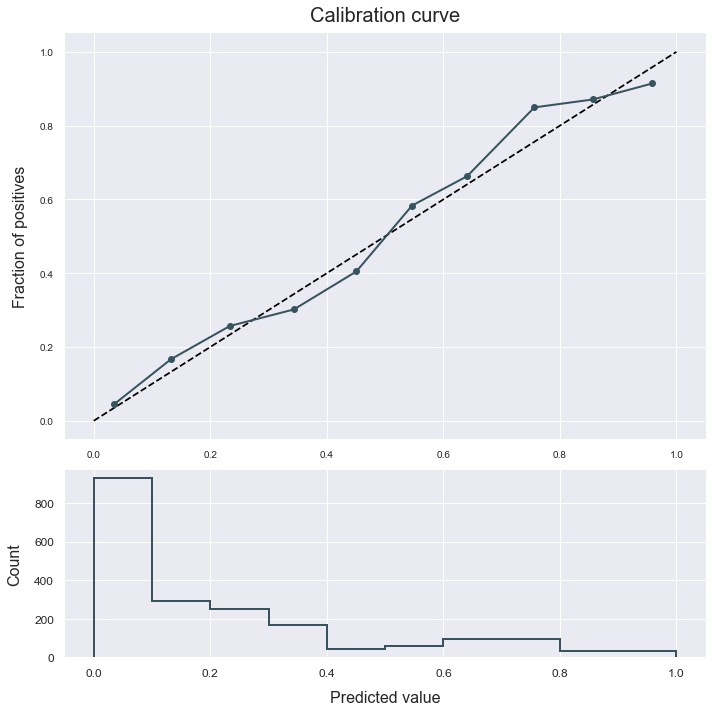

In [5]:
# Let's try to improve it using the calibrate method
atom.calibrate(method='isotonic', cv=5)
atom.plot_calibration()